<a href="https://colab.research.google.com/github/mohithxoxo/unsupervised-Learning/blob/master/Hierarchical_Clustering_with_retaildataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

--2020-09-22 13:40:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx  100%[===================>]  22.62M  31.1MB/s    in 0.7s    

2020-09-22 13:40:31 (31.1 MB/s) - ‘Online Retail.xlsx’ saved [23715344/23715344]



In [ ]:
# Importing the dataset
import pandas as pd
data = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
 # We are selecting just the two columns for simplicity.
data = data.drop(columns=['CustomerID','InvoiceNo','StockCode','Description','InvoiceDate','Country'])

In [12]:
X = data.iloc[0:3000,:].values
X

array([[6.  , 2.55],
       [6.  , 3.39],
       [8.  , 2.75],
       ...,
       [1.  , 1.66],
       [9.  , 5.91],
       [1.  , 0.85]])

In [34]:
from sklearn.preprocessing import Normalizer
nr = Normalizer()
X = nr.fit_transform(X)
X

array([[0.92033092, 0.39114064],
       [0.8706439 , 0.49191381],
       [0.9456866 , 0.32507977],
       ...,
       [0.51601263, 0.85658097],
       [0.83588812, 0.54889986],
       [0.76193932, 0.64764842]])

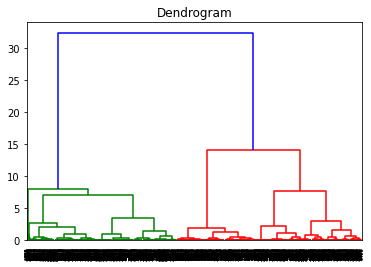

In [35]:
# Let's create the Dendrogram
import scipy.cluster.hierarchy as SCH
dendrogram = SCH.dendrogram(SCH.linkage(X, method='ward'))

import matplotlib.pyplot as plt
plt.title("Dendrogram")
plt.savefig("Dendrogram_of_Mall_Customers.png", dpi=1000)
plt.show()

Now Looking at the Dendrogram we can say that the optimal no. of clusters clould be 3.

In [68]:
# Let's train the Clustering model on our Dataset

# 1st creating the Model 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity="manhattan",linkage="complete")

#2nd fitting And predicting|
y = cluster.fit_predict(X)

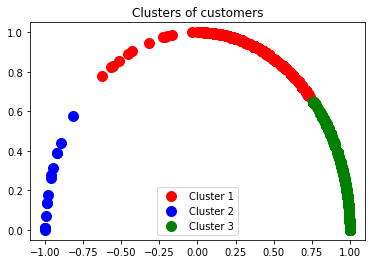

In [71]:
# let's visualize the clusters.
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.legend()
plt.show()